### Soham Vyas

In [15]:
import pandas as pd
import openpyxl

In [16]:
import numpy as np

## Variable Initialization

In [17]:
xls = pd.ExcelFile("Daily Gen pdpu-From-1-01-2021 (2).xlsx")

In [18]:
years = ["2012","2013","2014","2015","2016","2017","2018","2019","2020"]

In [19]:
year = "2015"

In [20]:
# label_list = ["Grid" ,
# "Module Cleaning",
# "Rainy day",
# "No Module Cleaning",
# "MCB Replacement",
# "Inverter Maintenance",
# "Transformer replacement and maintenance",
# "Cable and Fuse maintenance",
# "Plant Shutdown",
# "Inverter",
# "Internet",
# "Battery",
# "Cloudy",
# "Module Cleaning by rains",]
# # label_list

In [21]:
label_dict = {
    "Grid Failure" : [["Grid failure","Grid supply failure"], []],
    "Inverter" : [["Inverter"], ["fuse link" , "Module Cleaning"]],
    "Module Cleaning" : [["Module Cleaning"], ["no module cleaning"]],
    "Rainy day" : [["Rainy day"], []] ,
    "No Module Cleaning" : [["No Module Cleaning"], []] ,
    "Transformer replacement and maintenance" : [["Transformer replacement and maintenance" , "transformer"], []] ,
    "Cable and Fuse maintenance" : [["Cable and Fuse maintenance","MCB Replacement" , "fuse link"], []] ,
    "Plant Shutdown" : [["Plant Shutdown"], []] ,
    "Internet" : [["Internet"], []] ,
    "Battery" : [["Battery"], []] ,
    "Cloudy" : [["Cloudy"], []] ,
    "Module Cleaning by rains" : [["Module Cleaning by rains"], []]
}
    

In [22]:
# label_dict = {
#     "Grid Failure" : [["Grid","Grid supply failure"], []],
#     "Inverter Issue" : [["Inverter"], ["Module Cleaning"]],
#     "Module Cleaning" : [["Module Cleaning"], ["No Module Cleaning"]],
#     "Rainy day" : [["Rainy day"], []] ,
#     "No Module Cleaning" : [["No Module Cleaning"], []] ,
#     "MCB Replacement" : [["MCB Replacement"], []] ,
#     "Inverter Maintenance" : [["Inverter Maintenance"], []] ,
#     "Transformer replacement and maintenance" : [["Transformer replacement and maintenance"], []] ,
#     "Cable and Fuse maintenance" : [["Cable and Fuse maintenance"], []] ,
#     "Plant Shutdown" : [["Plant Shutdown"], []] ,
#     "Internet" : [["Internet"], []] ,
#     "Battery" : [["Battery"], []] ,
#     "Cloudy" : [["Cloudy"], []] ,
#     "Module Cleaning by rains" : [["Module Cleaning by rains"], []]
# }
# label_dict

## Functions

In [23]:
def reconstruct(xls, year):
    """
    It helps to remodel the csv to habituated df
    """

    df = pd.read_excel(xls, year)
    df = df[4:]
    column_names = {"Project Name" : "Date", "Unnamed: 1" : "1104500527", "PDPU-SEIPL, Gujarat 2010" : "1104500529", 
                    "Unnamed: 3" : "1.104501e+09", "Unnamed: 4" : "7802195.0", "Unnamed: 5" : "2100570073/ 2100567820/ 2100567898"}

    df = df.rename(columns=column_names)
    column_names = {"Unnamed: 6" : "Total Generation (KWH)", "Generation of "+year : "Aggregate Meter Reading (KWH)",
                   "Unnamed: 8" : "Difference", "Unnamed: 9" : "SEEDs data (KWH)",
                   "Unnamed: 10" : "Insolation", "Unnamed: 11" : "PR (%)", "Unnamed: 12" : "Any Issues/Problems Observed",
                   "Unnamed: 13" : "WO#", "Unnamed: 14" : "NO-OFF-CLEAN MODULES"}
    
    if int(year) < 2015:
        if int(year) == 2012:
            column_names = {"Unnamed: 6" : "Total Generation (KWH)", "Unnamed: 7" : "Aggregate Meter Reading (KWH)",
                   "Unnamed: 8" : "Difference", "Unnamed: 9" : "SEEDs data (KWH)",
                   "Unnamed: 10" : "Insolation", "Unnamed: 11" : "PR (%)", "Unnamed: 12" : "Any Issues/Problems Observed"
                    }
        else:
            column_names = {"Unnamed: 6" : "Total Generation (KWH)", "Generation of "+year : "Aggregate Meter Reading (KWH)",
                   "Unnamed: 8" : "Difference", "Unnamed: 9" : "SEEDs data (KWH)",
                   "Unnamed: 10" : "Insolation", "Unnamed: 11" : "PR (%)", "Unnamed: 12" : "Any Issues/Problems Observed"
                    }
    if int(year) == 2020:
        column_names = {"Unnamed: 6" : "Total Generation (KWH)", "Generation of "+year : "Aggregate Meter Reading (KWH)",
                   "Unnamed: 8" : "Difference", "Unnamed: 9" : "SEEDs data (KWH)",
                   "Unnamed: 10" : "Insolation", "Unnamed: 11" : "PR (%)", "Unnamed: 12" : "Any Issues/Problems Observed",
                        "Unnamed: 13" : "WO#", "Unnamed: 14" : "NO-OFF-CLEAN MODULES"
                    }

    df = df.rename(columns=column_names)
    df = df[3:]
    df_test = df.copy()
#     print(df_test)
    df_test = df_test.reindex(df_test.columns.tolist() + list(label_dict.keys()), axis=1)
    if int(year) < 2014:
        df_test.drop(df_test.iloc[:, 13:], inplace = True, axis = 1)
    return df_test

In [24]:
def labeling(df_test, label_list):
    final_result = []
    for index, row in df_test.iterrows():
        issue = row["Any Issues/Problems Observed"]
        print(index,issue)
        row_list = []
#         for (i,j) in enumerate(label_dict.iterms()):
#             for value in j:
#                 for label, stop in value:
                    
        for i in label_list:
            if i.lower() in str(issue).lower():
                print("check 1:",i)
                row_list.append(1)
                df_test.loc[index, i] = 1

            else:
                row_list.append(0)
                df_test.loc[index, i] = 0
        #end_for_labels
        final_result.append(row_list)
    #end_for_rows
    #print("\n\n",df_test.iloc[0])
        
    return final_result, df_test
    

In [25]:
def labeling2(df_test, label_dict):
    final_result = []
    for index, row in df_test.iterrows():
        issue = row["Any Issues/Problems Observed"]
        print(index,issue)
        row_list = []
#         for (i,j) in enumerate(label_dict.iterms()):
#             for value in j:
#                 for label, stop in value:
                    
        for i,j in label_dict.items():
            if any(ext in str(issue).lower() for ext in list(map(str.lower, j[0]))):
#                 print(j[1], any(text.lower() in str(issue).lower() for text in j[1]))
                if any(text.lower() in str(issue).lower() for text in j[1]):
                    print("break word appear " + str(j[1]) + " for " + str(j[0]))
                    row_list.append(0)
                    df_test.loc[index, i] = 0
                    continue
                print("check 1:",i)
                row_list.append(1)
                df_test.loc[index, i] = 1

            else:
                row_list.append(0)
                df_test.loc[index, i] = 0
        #end_for_labels
        final_result.append(row_list)
    #end_for_rows
    #print("\n\n",df_test.iloc[0])
        
    return final_result, df_test

## Running and labeling

In [26]:
df_obj = dict()
res_obj = dict()

In [27]:
for year in years:
    try:
        print(year)
        df_test = reconstruct(xls,year)
        res, final_df = labeling2(df_test, label_dict)
        print("labeling done", year)
        final_df = final_df.reset_index(drop=True)
        final_df.dropna(subset=["Date"], inplace=True)
        df_obj[year] = final_df
        res_obj[year] = res
    except:
        print("We are having problem in this year:",year)
#         df_test = reconstruct(xls,year)
#         print(df_test['Central Inverter 250 KW each total 4'])
        print(df_test.columns)

2012
7 Grid failure from 14.10 to 14.15 hours. Communication down, problem with SEEDS Gateway
check 1: Grid Failure
8 Grid failure from 13-37  to  13-42 hours. Communication down, problem with SEEDS Gateway
check 1: Grid Failure
9 Inverter 7802195 display not working. Communication down, problem with SEEDS Gateway
check 1: Inverter
10 Inverter 7802195 display not working. Communication down, problem with SEEDS Gateway
check 1: Inverter
11 Inverter 7802195 display not working. Communication down, problem with SEEDS Gateway
check 1: Inverter
12 Inverter 7802195 display not working. Communication down, problem with SEEDS Gateway
check 1: Inverter
13 Inverter 7802195 display not working. Communication down, problem with SEEDS Gateway
check 1: Inverter
14 Inverter 7802195 Break Down because of its S.M.P.S. found failed due to Moisture.
check 1: Inverter
15 Inverter 7802195 started from 16.54, after replacing the S.M.P.S  & Front panel Display unit
check 1: Inverter
16 Grid Supply Failure fr

2013
7 nan
8 nan
9 Plant Shut downed From 17-30  to  17-55 for Rectification of Oil Leakage Problem in Main X-mer (D-1168)
10 nan
11 nan
12 Grid Supply Failure From -09-19  to  11-45.
check 1: Grid Failure
13 Gris Supply Failure From - 11-27  to  11-30  &  11-31  to  12-29.
14 nan
15 nan
16 Grid Supply Failure From - 16-15  to  16-20.
check 1: Grid Failure
17 nan
18 nan
19 nan
20 Every Inverters Intermittent went in Fault Moded during the Period of  13-00  to  16-05 Because of Kite Festivel High Grid Voltages  problem Happened Severly for few second only 
check 1: Inverter
21 nan
22 nan
23 Grid Supply Failure From -15-30  to  15-35.
check 1: Grid Failure
24 nan
25 nan
26 Grid Supply Failure From - 11-37  to  12-30  &  18-00  to  18-55.
check 1: Grid Failure
27 nan
28 Grid Supply Failure From - 09-14  09-22  &  14-10  to  14-27.
check 1: Grid Failure
29 nan
30 Grid Supply From - 12-33  to  12-36  &  16-58  to  17-03.
31 nan
32 nan
33 nan
34 Grid Supply From - 09-59  to  09-03  &  17-09 

199 nan
200 nan
201 Grid Supply Failure From - 09-17  to  09-22.
check 1: Grid Failure
202 Grid Supply Failure From - 10-52  to  10-57,,,14-47  to  14-54  &  16-38  to  16-46. Internet failure from - 00-00  to  10-45.
check 1: Grid Failure
check 1: Internet
203 Grid Supply Failure From - 12-34  to  12-42, Internet Failure From - 15-15  to  17-10.
check 1: Grid Failure
check 1: Internet
204 Grid Supply Failure From - 07-47  to  07-51  &  15-30  to  15-35.
check 1: Grid Failure
205 nan
206 Grid Supply Failure From - 10-48  to  10-52  
check 1: Grid Failure
207 Grid Supply Failure From - 12-42  to  14-49.
check 1: Grid Failure
208 nan
209 nan
210 Grid Supply Failure From - 13-37  to  13-42  &  15-29  to  15-39.
check 1: Grid Failure
211 Grid Supply Failure From - 11-37  to  12-00.
check 1: Grid Failure
212 nan
213 Seeds Box Shutdowned From -11-40  to  19-45 for it`s Mantainace.
214 nan
215 Grid Supply Failure From - 17-28  to  17-36.
check 1: Grid Failure
216 nan
217 nan
218 Grid Supply F

338 nan
339 nan
340 Grid Supply Failure From - 15-24  to  15-31.
check 1: Grid Failure
341 nan
342 nan
343 Grid Supply Failure From - 16-00  to  16-05.
check 1: Grid Failure
344 nan
345 nan
346 nan
347 Grid Supply Failure From - 17-23  to  17-29.
check 1: Grid Failure
348 nan
349 Grid Supply Failure From - 11-28  to  11-36.
check 1: Grid Failure
350 nan
351 nan
352 Grid Supply Failure From - 16-20  to  16-57.
check 1: Grid Failure
353 nan
354 Grid Supply Failure From -10-47  to  10-50.
check 1: Grid Failure
355 nan
356 Grid Supply Failure From - 09-14  to  09-18.
check 1: Grid Failure
357 nan
358 nan
359 nan
360 Inv-3 Shut down From - 16-31  to  18-00 For Replaced The Control card of The Cooling Fan.
361 Grid Failure From - 11-20  to  11-28 , Inv-3 Shut down From - 09-40  to  11-17  &  16-00  to  17-26  and Inv-2 Shut down From - 11-18  to  12-25  &  16-00  to  17-26 For Replaced The Control card of The Cooling Fan.
check 1: Grid Failure
362 nan
363 nan
364 Grid Failure From- 17-30  to

241 Grid Failure From - 14:30 to 15:40 WO#1153598  & Rain & Cloudy
check 1: Grid Failure
check 1: Cloudy
242 Cloudy Day
check 1: Cloudy
243 Today I Replaced The D.C.12Amp Fuse Link of The String- 07 --tive in AJB-116 of The Inverter-3 during The Period of 10:20  To  10:25.WO#(1174948) & Rain & Cloudy
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Cable and Fuse maintenance
check 1: Cloudy
244 Cloudy Day
check 1: Cloudy
245 Today I Replaced The 1 D.C.12Amp Fuse Link of  The String- 07 ++tive in AJB-109 of The Inverter-2 during The Period of 10:50  To  10:55.WO#(1220529) & 2, D.C.12Amp Fuse Link of  The String- 08 --tive in AJB-112 of The Inverter-2 during The Period of 16:35  To  16:40.WO#(1223722)
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Cable and Fuse maintenance
246 nan
247 Grid Failure From 12:33 to12:47 for D.O Fuse of "Y" Phase blown after replace fuse and plant start  
check 1: Grid Failure
248 Cloudy Day
check 1: 

check 1: Battery
320 Inverter 1 is down, informed ABB.They will be working resolve this issue WO#1926581 & U.P.S & Battery charger Blown
check 1: Inverter
check 1: Battery
321 nan
322 Inverter 1 is down, informed ABB.They will be working resolve this issue WO#1926581 & U.P.S & Battery charger Blown
check 1: Inverter
check 1: Battery
323 Inverter 1 is down, informed ABB.They will be working resolve this issue WO#1926581 & U.P.S & Battery charger Blown
check 1: Inverter
check 1: Battery
324 Inverter 1 is down, informed ABB.They will be working resolve this issue WO#1926581 &  Battery charger Blown & U.P.S rectified
check 1: Inverter
check 1: Battery
325 Inverter 1 is down, informed ABB.They will be working resolve this issue WO#1926581 &  Battery charger Blown
check 1: Inverter
check 1: Battery
326 Inverter 1 is down, informed ABB.They will be working resolve this issue WO#1926581 &  Battery charger Blown
check 1: Inverter
check 1: Battery
327 Inverter 1 is down, informed ABB.They will b

395 nan
396 nan
397 nan
398 nan
399 nan
400 nan
401 nan
402 nan
403 nan
404 nan
405 nan
406 nan
407 nan
408 nan
409 nan
410 nan
411 nan
412 nan
413 nan
414 nan
415 nan
416 nan
417 nan
418 nan
419 nan
420 nan
421 nan
422 nan
423 nan
424 nan
425 nan
426 nan
427 nan
428 nan
429 nan
430 nan
431 nan
432 nan
433 nan
434 nan
435 nan
436 nan
437 nan
438 nan
439 nan
440 nan
441 nan
442 nan
443 nan
444 nan
445 nan
446 nan
447 nan
448 nan
449 nan
450 nan
451 nan
452 nan
453 nan
454 nan
455 nan
456 nan
457 nan
458 nan
459 nan
460 nan
461 nan
462 nan
463 nan
464 nan
465 nan
466 nan
467 nan
468 nan
469 nan
470 nan
471 nan
472 nan
473 nan
474 nan
475 nan
476 nan
477 nan
478 nan
479 nan
480 nan
481 nan
482 nan
483 nan
484 nan
485 nan
486 nan
487 nan
488 nan
489 nan
490 nan
491 nan
492 nan
493 nan
494 nan
495 nan
496 nan
497 nan
498 nan
499 nan
500 nan
501 nan
502 nan
503 nan
504 nan
505 nan
506 nan
507 nan
508 nan
509 nan
labeling done 2014
2015
7 Inverter No- 3 Auto trip 8:50 (modulre fan problem) 9:

check 1: Cable and Fuse maintenance
83 Today I Replaced The D.C.12Amp Fuse Link of The String- 04 --tive in AJB-105 of The Inverter-4 during The Period of 10:15  To  10:20.WO#(6812097) 
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Cable and Fuse maintenance
84 NO any Issue
85 Module cleaning done Inverter-3  Row P,Q,R,S,T, Total module cleaning 630
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
86 Module cleaning done Inverter-3 & 2  Row L,M,N,O, Total module cleaning 650
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
87 Today I Replaced The D.C.12Amp Fuse Link of The String- 04 ++tive in AJB-101 of The Inverter-4 during The Period of 12:20  To  12:25.WO#(7104864) & Grid supply failure from 8:07 to 8:13 (WO#7098699) & Module cleaning done Inverter- 4  Row -H,I,J,K, Total module cleaning- 650 
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning']

154 NO any Issue
155 Module cleaning done Inverter- 1 Row- C,D,E, & Total module cleaning 600 & Grid Failure From -07:20 to 08:05 WO#12736715
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
156 Module cleaning done Inverter- 1 & 4 Row- ,A,B, & A,B,C,D, & Total module cleaning- 610
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
157 Module cleaning done Inverter- 4 Row- ,E,F,G, & Total module cleaning- 560
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
158 Module cleaning done Inverter- 4 Row- ,H,I,J, & Total module cleaning- 596
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
159 Module cleaning done Inverter- 4 & 3 & Trackers Row- ,K,L,& R,S,T, & Total module cleaning 660 & Grid Failure From -12:52 to 12:57 WO#13149762 & Tracker P.M
check 1: Grid Failure
break word appear ['fuse link',

230 Module cleaning done Inverter- 4  Row- ,F,G,H, & Total module cleaning- 594 & Grid Failure From -06:30 to 06:40 WO#17177576
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
231 Module cleaning done inverter -4 Row- ,I,J,K,L,, & Total module cleaning -690
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
232 Module cleaning done inverter -3 & Trackers Row- ,O,P,Q,R,S,T, & Total module cleaning -604
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
233 Module cleaning done Inverter- 3&2  Row- ,L,M,N, & Total module cleaning- 714 & Grid Failure From -15:03 to 15:10 WO#17364939
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
234 Inverter no-2 ABB-Auto Trip becose Inverters Bloware fan (supply card) Bourned Inverter trip -12:20 to 15:55 WO#
check 1: Inverter
235 Inverter 

311 Module cleaning done inverter -4  Row- ,A,B,C,D,E, & Total module cleaning -630  
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
312 Grid Failure From-17:21 to 17:32 WO#21218179
check 1: Grid Failure
313 Grid Failure From-11:10 to 11:22 WO#21252902
check 1: Grid Failure
314 Module cleaning done inverter -4  Row- ,F,G,H, & Total module cleaning -594  
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
315 Module cleaning done inverter -4  Row- ,I,J,K,L, & Total module cleaning -690  
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
316 Module cleaning done inverter -3 & Trackers Row- ,O,P,Q,R,S,T, & Total module cleaning -604  & Grid Failure From-08:57 to 09:15 WO#(21392605) & Today Replace Transformers New Bridhar & slicagel (2,3,4,)
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
check

393 nan
394 nan
395 nan
396 nan
397 nan
398 nan
399 nan
400 nan
401 nan
402 nan
403 nan
404 nan
405 nan
406 nan
407 nan
408 nan
409 nan
410 nan
411 nan
412 nan
413 nan
414 nan
415 nan
416 nan
417 nan
418 nan
419 nan
420 nan
421 nan
422 nan
423 nan
424 nan
425 nan
426 nan
427 nan
428 nan
429 nan
430 nan
431 nan
432 nan
433 nan
434 nan
435 nan
436 nan
437 nan
438 nan
439 nan
440 nan
441 nan
442 nan
443 nan
444 nan
445 nan
446 nan
447 nan
448 nan
449 nan
450 nan
451 nan
452 nan
453 nan
454 nan
455 nan
456 nan
457 nan
458 nan
459 nan
460 nan
461 nan
462 nan
463 nan
464 nan
465 nan
466 nan
labeling done 2015
2016
7 nan
8 Module cleaning done inverter -4  Row- ,A,B,C,D,E, & Total module cleaning -594 & Grid Failure From- 14:03 to 14:08WO#
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
9 nan
10 Module cleaning done inverter -4  Row- ,F,G,H, & Total module cleaning -594
break word appear ['fuse link', 'Module Cleaning'] for ['

78 Module cleaning done inverter -3 Row- ,N,O,P,Q,R,  & Total module cleaning -756 & Grid Failure From-17:29 to 17:56
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
79 Module cleaning done inverter -3 & 2 Row- ,K,L,M,  & Total module cleaning -777 
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
80 Module cleaning done inverter -2 Row- ,H,I,J,  & Total module cleaning -798 & Morning Time Grid Failure Inverter No-2,3,4, started 8:35 & Inverter No-1 started 9:20 (D.C. Bracker Auto trip)
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
81 Grid Failure From-11:07 to 11:11
check 1: Grid Failure
82 Module cleaning done inverter -1 Row- ,E,F,G,  & Total module cleaning -546 & Grid Failure From-7:26 to 7:51 & 11:20 to 11:30
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check

152 Module cleaning done inverter -1 Row- ,E,F,G,  & Total module cleaning -546 & Grid Failure From-14:55 to 16:21 & Combiner P.M  (250 Kw Thinfilm side)
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
153 Grid Failure From-10:32 to 10:41 & 14:15 to 14:55
check 1: Grid Failure
154 Module cleaning done inverter -1 & 4 Row- ,A,B,C,D,& A,B,  & Total module cleaning -498 & Grid Failure From-16:28 to 10:35
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
155 Module cleaning done inverter -4 Row- ,C,D,E,F,  & Total module cleaning -630 & Cloudy day
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
check 1: Cloudy
156 Module cleaning done inverter -4 Row- ,G,H,I,  & Total module cleaning -594 & Cloudy day
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
check 1: Cloudy
157 Mod

check 1: Cloudy
218 cloudy day & Inverter no-4 Schneider 250 kw morning time note wakeup Err code-0853 ( cold OR Inverter V Range ) Inverter steel sut down 
check 1: Inverter
check 1: Cloudy
219 cloudy day & Inverter no-4 Schneider 250 kw morning time note wakeup Err code-0853 ( cold OR Inverter V Range ) Inverter steel sut down & Grid Failure From-10:44 to 10:55
check 1: Grid Failure
check 1: Inverter
check 1: Cloudy
220 Cloudy & Rainy Day & Inverter no-4 Schneider 250 kw morning time note wakeup Err code-0853 ( cold OR Inverter V Range ) Inverter steel sut down & Inverter no-3 ABB 250KW Auto trip 13:30 Err code D14 ALM (108A) Reset Err code Inverter started-13:45 
check 1: Inverter
check 1: Rainy day
check 1: Cloudy
221 cloudy & Rainy day & Inverter no-4 Schneider 250 kw morning time note wakeup Err code-0853 ( cold OR Inverter V Range ) Inverter steel sut down 
check 1: Inverter
check 1: Rainy day
check 1: Cloudy
222 Cloudy & Rainy Day & Inverter no-4 Schneider 250 kw morning time n

check 1: Cloudy
281 cloudy day & Inverter no-4 Schneider 250 kw morning time note wakeup Err code-0853 ( cold OR Inverter V Range ) Date-13-07-16 Inverter steel sut down & Grid Failure From-07:50 to 08:00 & 11:55 to 12:01 WO# 
check 1: Grid Failure
check 1: Inverter
check 1: Cloudy
282 cloudy day & Inverter no-4 Schneider 250 kw morning time note wakeup Err code-0853 ( cold OR Inverter V Range ) Date-13-07-16 Inverter steel sut down
check 1: Inverter
check 1: Cloudy
283 cloudy day & Inverter no-4 Schneider 250 kw morning time note wakeup Err code-0853 ( cold OR Inverter V Range ) Date-13-07-16 Inverter steel sut down
check 1: Inverter
check 1: Cloudy
284 cloudy day & Inverter no-4 Schneider 250 kw morning time note wakeup Err code-0853 ( cold OR Inverter V Range ) Date-13-07-16 Inverter steel sut down & Grid Failure From-15:36 to 15:41 WO# 
check 1: Grid Failure
check 1: Inverter
check 1: Cloudy
285  Module cleaning done inverter -3 Row- ,O,P,Q,R,S,T,  & Total module cleaning -630 & In

350  Module cleaning done inverter -3&2 Row-,L,M,N, & Total module cleaning -714 & Inverter No - 4 250KW Schneider trip on Error code 0016, DC Contactor, Date:03/11/2016 , 12:50 pm inverter stop to still shut  WO#  & Trackers P.M
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
351  Module cleaning done inverter -2 Row-,I,J,K, & Total module cleaning -840 & Inverter No - 4 250KW Schneider trip on Error code 0016, DC Contactor, Date:03/11/2016 , 12:50 pm inverter stop to still shut WO#
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
352 nan
353 Today replaced 5 Damaged moduleModule                                                               No-1-Lower side string No-5, ROW-B, Module No-2, AJB No-100, Thin Film 140 Watts, Next Power,
                            Damage Module Sr No-NPC10BY1108800
                            New Module Sr No-NPC10BY1113787
Module No-2-Lower side string No-9, ROW-G, M

/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


7 Inverter No - 4 250KW Schneider trip on Error code 0016, DC Contactor, Date:03/11/2016 , 12:50 pm inverter stop to still shut Down WO#
check 1: Inverter
8  Module cleaning done inverter -4 Row-,J,K,L, & Total module cleaning -468 & Inverter No - 4 250KW Schneider trip on Error code 0016, DC Contactor, Date:03/11/2016 , 12:50 pm inverter stop to still shut DownWO#
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
9  Today I Replaced The D.C.12Amp Fuse Link of The String-07--tive in AJB-111 of The Inverter-2 during The Period of 11:30 To 11:40 &  Module cleaning done inverter -3 Row-,O,P,Q,R,S,T, & Total module cleaning -690 & Inverter No - 4 250KW Schneider trip on Error code 0016, DC Contactor, Date:03/11/2016 , 12:50 pm inverter stop to still shut Down & Grid Failure From 15:48 to 15:56 WO#
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
check 1: Cable and Fuse maintenance
1

71 Module cleaning done inverter -1 & Row-,E,F,G,H, & Total module cleaning -777 & Today morning time Inverter No-3 ABB 250 KW not wake up Due to D.c. Breaker Failure inverter started Manually-10:50 &  Today I Replaced The D.C.12Amp Fuse Link of The String-09++tive in AJB-116 of The Inverter-3 during The Period of 12:40 To 12:50 & Grid Failure From-08:56 to 09:08 & 09:10 to 09:23 & 11:28 to 11:36  WO#
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
check 1: Cable and Fuse maintenance
72 Today morning time Inverter No-3 ABB 250 KW not wake up Due to D.c. Breaker Failure inverter started Manually-07:50 WO#
check 1: Inverter
73 Module cleaning done inverter -1&4 & Row-,A,B,C,D,& ,A,B,C, & Total module cleaning -624 & Today morning time Inverter No-3 ABB 250 KW not wake up Due to D.c. Breaker Failure inverter started Manually-07:50   WO#
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cle

134 Module cleaning done inverter -3&2, Row-L,M,N, & Total module cleaning -714, WO#
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
135 Module cleaning done inverter -2, Row-I,J,K, & Total module cleaning -840,WO# 
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
136 Module cleaning done inverter -1 & Row-,E,F,G,H, & Total module cleaning -777, WO#
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
137 Sunday No Module Cleaning
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
138 Module cleaning done inverter -1&4, Row-,A,B,C,D,&,A,B,C, & Total module cleaning -624, WO#
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
139 Module cleaning done inverter -4 & Row-,D,E,F,G, & Total module cleaning -704, WO#
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']

check 1: Cloudy
212 Rainy & cloudy day & Grid Failure From-09:44 to 09:47
check 1: Grid Failure
check 1: Cloudy
213 Rainy & cloudy day
check 1: Cloudy
214 Rainy & cloudy day
check 1: Cloudy
215 Rainy & cloudy day & Grid Failure From-09:02 to 09:19 & 15:24 to 15:27 & 15:43 to 15:48
check 1: Grid Failure
check 1: Cloudy
216 Rainy & cloudy day
check 1: Cloudy
217 Rainy & cloudy day
check 1: Cloudy
218 Rainy & cloudy day
check 1: Cloudy
219 Rainy & cloudy day
check 1: Cloudy
220 Rainy & cloudy day
check 1: Cloudy
221 Rainy & cloudy day
check 1: Cloudy
222 Rainy & cloudy day & 11 KV Switch yard Site GOD Switch Repleced 'R' Phase cable & Luges,
check 1: Cloudy
223 Today I Replaced The 2 D.C.12Amp Fuse Link of The String-04--tive in AJB-113 of The Inverter-3 during The Period of 09:40 to 09:50 & string no-2++tive line AJB-101 Inverter no-4 During the period of 10:50 to 11:00 &Today Replaced 1 MC4 Connecter string No-8 AJB No-117 Inverter No-3 Durring The period 9:30 to 9:40 & Grid Failure Fro

373 Module cleaning has been done in Row-H,I,J,K,L, & Inverter no-4 & Total module cleaning-864
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
374 Module cleaning has been done in Row-Q,R,S,T, & Inverter no-3 & Total module cleaning-294 & Grid failure from-14:55 to 15:02 & Color working to AJB structure box-100 to 111
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
375 Sunday no module cleaning
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
376 Color working to AJB box & structure -112 to 118
377 Module cleaning has been done in Row-M,N,O,P &Inverter no-3 & Total module cleaning-798 & Grid failure from-9:03 to 9:10
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
378 PDPU BOR Failure No Module cleaning
break word appear ['no module cleaning'] for ['Module Cleaning'

/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


7 Module cleaning has been done in Row-A,B,C,D,E,F,G, & Inverter no-1 & Total module cleaning-882 & Grid failure from-13:22 to 13:51
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
8 Module cleaning has been done in Row-A,B,C,D,E, & Inverter no-4 & Total module cleaning-594
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
9 Inverter-3 cut off at-13:10 due to installing a new inverter & Grid failure from-17:05 to 19:00
check 1: Grid Failure
check 1: Inverter
10 Module cleaning has been done in Row-F,G,H,I, & Inverter no-4 & Total module cleaning-772 & Grid Failure from-16:14 to 16:18
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
11 Grid Failure From-9:35 to 14:10
check 1: Grid Failure
12 Today inverter no-3 new ABB 250KW inverter commissioning by ABB Mr. Slimbhai Dadu , Inverter started-5:00PM & Grid Failure f

84 Module cleaning has been done in Row-,O,P,Q,R,S,T,& Inverter No-3 & Total module cleaning-630
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
85 Today morning time inverter no - 2 ABB 250 kw not wake up due to Err Auto Reset F (8185) & Reset Manually inerter started at 8:21
check 1: Inverter
86 Module cleaning has been done in Row-,L,M,N,& Inverter No-3&2 & Total module cleaning-714 & Grid Failure From-09:15 to 09:21 & Day was cloudy
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
check 1: Cloudy
87 Module cleaning has been done in Row-,I,J,K, & Inverter No-2 & Total module cleaning-840,
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
88 Module cleaning has been done in Row-,G,H, & Inverter No-1&2 & Total module cleaning-441 & Replaced New Door Handle of Inverter No - 1 ABB 
break word appear ['fuse link', 'Module Cleaning'] for

149 Grid failure from 5:47 to 5:52, Module cleaning has not done due to absence of manpower
check 1: Grid Failure
check 1: Module Cleaning
150 Today morning time inverter no - 4 ABB 250 kw not wake up due to Err Auto Reset F (8185) & Reset Manually inerter started at 8:12.
check 1: Inverter
151 Module Cleaning has been done in Row-P,Q,R,S,T, Inverter No-3 & total module cleaning-441, No Grid failure,Replace 400 W halogen lamp & fix new LED light(150 W-5 peace).
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
152 Module Cleaning has been done in Row-N,O Inverter No-3 & total module cleaning-399, No Grid failure.
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
153 Today morning time inverter no - 4 ABB 250 kw not wake up due to Err Auto Reset F (8185) & Reset Manually inerter started at 8:55, Module Cleaning has been done in Row-J,K,L,M Inverter No-2,3 & t

check 1: Cloudy
212 Grid Failure From-15:43 to 17:17, & Module clean by Rain & Rainy & Fully cloudy day & Today Replaced New cat 6 communication cable for AJB 102 to AJB-103, (Replaced total cable 25 meter)
check 1: Grid Failure
check 1: Cloudy
213 Grid Failure From-15:43 to 17:17, & Module clean by Rain & Rainy & Fully cloudy day & Today Replaced New cat 6 communication cable for AJB 103 to AJB-104, (Replaced total cable 25 meter) &  Today I Replaced The D.C.12Amp Fuse Link of The String-07++tive in AJB-109 of The Inverter-2 during The Period of 17:30 To 17:40 
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Cable and Fuse maintenance
check 1: Cloudy
214 Grid Failure From-15:43 to 17:17, & Module clean by Rain & Rainy & Fully cloudy day & Today Replaced New cat 6 communication cable for AJB 104 to AJB-105, (Replaced total cable 25 meter)
check 1: Grid Failure
check 1: Cloudy
215  Module clean by Rain & Rainy & Fully cloudy day
check 1

341 No Module Cleaning
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
342 Grid Failure From - 13:04 to 13:07.
check 1: Grid Failure
343 No Module Cleaning
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
344 No Module Cleaning
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
345 No Module Cleaning
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
346 Couldy Day & Grid Failure From - 17:12 to 17:50.
check 1: Grid Failure
347 Couldy Day & No Module cleaning.
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
348 Couldy Day & No Module cleaning.
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
349 No Module Cleaning
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
350 Today Replaced The 

403 nan
404 nan
405 nan
406 nan
407 nan
408 nan
409 nan
410 nan
411 nan
412 nan
413 nan
414 nan
415 nan
416 nan
417 nan
418 nan
419 nan
420 nan
421 nan
422 nan
423 nan
424 nan
425 nan
426 nan
427 nan
428 nan
429 nan
430 nan
431 nan
432 nan
433 nan
434 nan
435 nan
436 nan
437 nan
438 nan
439 nan
440 nan
441 nan
442 nan
443 nan
444 nan
445 nan
446 nan
447 nan
448 nan
449 nan
450 nan
451 nan
452 nan
453 nan
454 nan
455 nan
456 nan
457 nan
458 nan
459 nan
460 nan
461 nan
462 nan
463 nan
464 nan
465 nan
466 nan
467 nan
468 nan
469 nan
470 nan
471 nan
472 nan
473 nan
474 nan
475 nan
476 nan
477 nan
478 nan
479 nan
480 nan
481 nan
482 nan
483 nan
484 nan
485 nan
486 nan
487 nan
488 nan
489 nan
490 nan
491 nan
492 nan
493 nan
494 nan
495 nan
496 nan
497 nan
498 nan
499 nan
500 nan
501 nan
502 nan
503 nan
504 nan
505 nan
506 nan
507 nan
508 nan
509 nan
510 nan
511 nan
512 nan
513 nan
514 nan
515 nan
516 nan
517 nan
518 nan
519 nan
520 nan
521 nan
522 nan
523 nan
524 nan
525 nan
526 nan
527 nan


/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


7 Grid Failure From-15:49 to 15:56, Module Cleaning has been done in Row-A,B,C,D,E, Inverter No-4 , total module cleaning-524.
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
8 Today morning time Inverter No :-4 ,ABB 250KW not wake up due to error " GND CLOSER ER (8196)" ,Reset manually Inverter started 9:05.& Grid Failure From-16:03 to 16:07, Module Cleaning has been done in Row-P,Q,R,S,T, Inverter No-3 , total module cleaning-441.
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
9 Grid Failure From-17:19 to 17:20, Module Cleaning has been done in Row-L,M,N,O, Inverter No-2 & 3 , total module cleaning-903.
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
10 Module Cleaning has been done in Row-G,H,I,J,K, Inverter No-1 & 2 , total module cleaning-1281.
break word appear ['fuse link', 'Modul

83 No Module cleaning due to water pipe crack in pdpu campus side.
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
84 No Module cleaning due to water pipe crack in pdpu campus.Grid Failure From- 08:20 to 08:28.
check 1: Grid Failure
break word appear ['no module cleaning'] for ['Module Cleaning']
check 1: No Module Cleaning
85 Module Cleaning has been done in Row-F,G. Inverter No- 3, total module cleaning-396.
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
86 nan
87 Today Morning time short circuit (7:53 to 7:57) in H Pole by pigeon Fall in line ,Grid failure from 7:53 to 7:57.Module Cleaning has been done in Row-,H,I,J,K,L, &S ,T , Trackers. Inverter No- 4 & 3, total module cleaning-1010.
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
88 Module Cleaning has been done in Row-O,P,Q,R Inverter No- 3, total module cleaning-546.
brea

154 Grid Failure From-10:46 to 10:54.
check 1: Grid Failure
155 nan
156 nan
157 Today Replaced The D.C.12 Amp Fuse Link of The String-03 ++tive in AJB-114 of The Inverter-3 during The Period of 7:35 To 7:40
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Cable and Fuse maintenance
158 Grid Failure From-10:02 to 10:21 and 16:13 to 16:39.
check 1: Grid Failure
159 nan
160 nan
161 nan
162 nan
163 comissioning and installation of 110V DC FCBC Charger and Battery set (UPST 110V AH Battery) by Servilink engineer Pvt.Ltd ,Grid Failure From-14:42 to 15:00.
check 1: Grid Failure
check 1: Battery
164 Today PM of  Y Phase cable changed and replaced new phase in VCB side on 'H'  pole and Measuring P.T. (3 Nos) Fuses  are changed and replaced new  R,Y,B Line fuse in V.C.B.(12KV HCR fuses) 
165 Grid Failure From-11:36 to 11:40.
check 1: Grid Failure
166 nan
167 nan
168 nan
169 Today Cloudy weather.Today Replaced The D.C.12 Amp Fuse Link of The String-02 --tive in AJB-102

check 1: Cloudy
225  cloudy day
check 1: Cloudy
226 Today we are found the cable fault (Under ground) in AJB No. 8,9 and 10 of the Inverter No.2. So we are bypass MCB and AJB No 8 and 10 in Inverter,Because the MCB No 8 and 10 are Auto trip.cloudy day
check 1: Inverter
check 1: Cloudy
227  cloudy day
check 1: Cloudy
228 cloudy day.Grid Failure From-10:30 to 10:36 and 12:12 to 12:51 &13:52 to 13:58 and 14:38 to 16:20.
check 1: Grid Failure
check 1: Cloudy
229  cloudy day
check 1: Cloudy
230 Today has been done all air filter paper clean in all inverter. cloudy day.Grid Failure From-15:22 to 15:27 and 16:32 to 16:34.
check 1: Grid Failure
check 1: Inverter
check 1: Cloudy
231  cloudy day
check 1: Cloudy
232 Full Cloudy day,Today evening time Mr.Alpha Engineers team came to cable fault finding ,found the 5 cable fault. 3 cable fault in cable peet & 2 cable fault found near 5meter cable peet. cable fault in AJB No108 ++tive and --tive, AJB No:109 --tive and AJB No:110 ++tive and --tive are

383 nan
384 nan
385 nan
386 nan
387 nan
388 nan
389 nan
390 nan
391 nan
392 nan
393 nan
394 nan
395 nan
396 nan
397 nan
labeling done 2019
2020


/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


7 Module Cleaning has been done in Row-B,C,D,E,F,  Inverter No-1, total module cleaning-624. cloudy day and Grid Failure from-14:20 to 14:24 .
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
check 1: Cloudy
8 Module Cleaning has been done in Row-A,& A,B,C,D,E,F,G Inverter No-1&4, total module cleaning-1032. cloudy day and Grid Failure from-15:13 to 15:15 and 15:20 to 15:25.
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
check 1: Cloudy
9 Module Cleaning has been done in Row-H,I,J,K,  Inverter No-4, total module cleaning-738.Today Replaced the connector of the string-01 in AJB-112 of The Inverter-3.
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
10 crack
11 Module Cleaning has been done in Row-O,R,S,T  and L and Tracker,  Inverter No-3 and 4, total module cleaning-480. cloudy day and Grid Failure from-11:30 t

83 Module Cleaning has been done in Row-J,K,L, and trackers, Inverter No 4, total module cleaning-528.
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
84 Today we are installed New LBS (650A) & 63KVA distribution transformer (11/.433KV) and get new supply in Plant(60 meter installed new 70Sq mm cable cable in 415V (LT) side).We are install new Analog Volt meter 415/110V (make: Rishab) in LT panel and Module Cleaning has been done in Row-P,Q,R,S,T , Inverter No 3, total module cleaning-441.
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
check 1: Transformer replacement and maintenance
85 Module Cleaning has been done in Row-N,O , Inverter No 3, total module cleaning-399.Today Came UGVCL Line man in evening time due to  "B" Phase AB Switch are Sparking, So G.O.D Switch are disconnected for UGVCL Pole and add new link and joint the cable in during 16:14 to 16:55
break word appear ['fuse link', 'Modu

check 1: Cable and Fuse maintenance
149 Module Cleaning has been done in Row- M,N,O,P,Q,R,S,T,  Inverter No 3, total module cleaning-1092.
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
150 Module Cleaning has been done in Row-I,J,K,L,  Inverter No- 2, total module cleaning-1092.
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
151 Today has been done  Air filter paper clean of all inverter.(Cabinet door Filter).Module Cleaning has been done in Row- A,B,C,D,E,F,G, H, Inverter No- 1, total module cleaning-1113.
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
152 Today we are replaced 125A Change over switch of Incoming line 415V during 10:34 to 13:00..Module Cleaning has been done in Row-A,B,C,D,E,F,G, Inverter No- 4, total module cleaning-990.
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
153 Grid failure f

check 1: Cloudy
220 Cloudy day
check 1: Cloudy
221 Cloudy day.Grid failure from 15:39 to 15:46
check 1: Grid Failure
check 1: Cloudy
222 Cloudy day
check 1: Cloudy
223 Cloudy day
check 1: Cloudy
224 Cloudy day.Grid failure from 16:43 to 17:02
check 1: Grid Failure
check 1: Cloudy
225 Today we are change and replace new phase failure relay in Inverter no-1 during 9:45 to 10:30 and change and replace new SPD in AJB No-109 in Inverter No-2 during 10:40 to 11:45.  .Module clean by rain.fully cloudy day
check 1: Inverter
check 1: Cloudy
226 Today we are change and replace new SPD in AJB No-104 in Inverter No-1 and AJB No-117 in Inverter No-3 during 9:10 to 09:45.Module clean by rain.fully cloudy day
check 1: Inverter
check 1: Cloudy
227 Module clean by rain.Cloudy day
check 1: Cloudy
228 Module clean by rain.fully cloudy day 
check 1: Cloudy
229 Module clean by rain.cloudy day 
check 1: Cloudy
230 Today we are replaced connector in string no-03(++tive) of AJB No-104 inverter no-1 during 10:

360 Module Cleaning has been done in Row- K,L, Tracker 1,2,3, and Row-M,N,O,P,Q,R,S,T, Inverter No- 3 and 4, total module cleaning-1440 
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
361 nan
362 Module Cleaning has been done in Row-I,J,k,l Inverter No-2 & G,H Inverter No-1  total module cleaning - 1533 
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
363 Module Cleaning has been done in Row-A,B,C,D,E,F Inverter No-1 & A,B,C,D,E,F Inverter No-4  total module cleaning - 1464
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
364 Module Cleaning has been done in Row-G,H,I,J,K,L, Tracker 1,2,3, and Row-Q,R,S,T, Inverter No- 4 and 3 total module cleaning-1416
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
365 Module Cleaning has been done in Row-M,N,O,P and Row-J,K,L Inverter No-3 and 2 total module cleaning-1617


In [28]:
# df_obj['2015'].columns

In [29]:
# res, final_df = labeling(df_test, label_list)

In [30]:
#res

In [31]:
pd.set_option("display.max_columns", None)

In [32]:
# pd.set_option("display.max_rows", None)

In [33]:
# final_df = final_df.reset_index(drop=True)
# final_df.dropna(subset=["Date"], inplace=True)

In [34]:
# final_df.head(50)

## Results

In [35]:
df_obj['2020'].head(10)

,Date,1104500527,1104500529,1.104501e+09,7802195.0,2100570073/ 2100567820/ 2100567898,Total Generation (KWH),Aggregate Meter Reading (KWH),Difference,SEEDs data (KWH),Insolation,PR (%),Any Issues/Problems Observed,WO#,NO-OFF-CLEAN MODULES,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
0,2020-01-01 00:00:00,545,721,686.0,690,31.78,2673.78,2559,114.78,2679,3.556,0.734283,"Module Cleaning has been done in Row-B,C,D,E,F...",NaN,624,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2020-01-02 00:00:00,580,781,731.0,756,34.56,2882.56,2748.75,133.81,2888,3.974,0.708308,"Module Cleaning has been done in Row-A,& A,B,C...",NaN,1032,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2020-01-03 00:00:00,604,807,766.0,817,37.06,3031.06,2903.25,127.81,3036,4.061,0.728654,"Module Cleaning has been done in Row-H,I,J,K, ...",NaN,738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04 00:00:00,666,912,852.0,892,44,3366,3226.5,139.5,3371,4.634,0.709015,crack,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05 00:00:00,625,852,811.0,922,47.54,3257.54,3126.75,130.79,3263,5.407,0.588184,"Module Cleaning has been done in Row-O,R,S,T ...",NaN,480,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2020-01-06 00:00:00,710,973,953.0,1054,53.16,3743.16,3609.75,133.41,3749,5.167,0.707179,"Module Cleaning has been done in Row-L,M,N,O,P...",NaN,924,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-07 00:00:00,524,700,695.0,731,33.05,2683.05,2559.75,123.3,2688,3.688,0.71038,Today came Mahindra Teqo company for On-site T...,NaN,399,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2020-01-08 00:00:00,706,993,948.0,1028,51.23,3726.23,3586,140.23,3732,5.054,0.719712,"Module Cleaning has been done in Row-F,G,H,I, ...",NaN,903,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2020-01-09 00:00:00,837,1185,1124.0,1230,66.68,4442.68,4275,167.68,4448,5.652,0.767035,Today came Mahindra Teqo company for On-site T...,NaN,438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2020-01-10 00:00:00,685,973,897.0,972,54.02,3581.02,3461,120.02,3587,5.878,0.594777,"Module Cleaning has been done in Row-A,B.And,A...",NaN,393,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_obj.keys()

dict_keys(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

In [37]:
# writer = pd.ExcelWriter('output.xlsx')

In [38]:
# for i in years:
#     df_obj[i].to_excel(writer,sheet_name=i)

In [39]:
df_obj['2015']

,Date,1104500527,1104500529,1.104501e+09,7802195.0,2100570073/ 2100567820/ 2100567898,Total Generation (KWH),Aggregate Meter Reading (KWH),Difference,SEEDs data (KWH),Insolation,PR (%),Any Issues/Problems Observed,WO#,NO-OFF-CLEAN MODULES,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
0,2015-01-01 00:00:00,542,560,509.0,529.0,22.5,2162.5,2035.5,127,2197,2.78,77.02,Inverter No- 3 Auto trip 8:50 (modulre fan pro...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-02 00:00:00,792,831,842.0,821.0,36.93,3322.93,3177,145.93,3352,4.15,78.72,Grid Failure From 13:02 to 13:09 WO#3402756,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006-01-03 00:00:00,933,978,995.0,953.0,49.96,3908.96,3755.25,153.71,3942,5.303,72.45,Grid Failure From 8:05 to 9:19 WO#3419549,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-04 00:00:00,1046,1102,1114.0,1071.0,61.29,4394.29,4210.5,183.79,4430,NaN,NaN,Grid Failure From 16:45 to 18:45 WO#3450753,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-05 00:00:00,893,939,944.0,902.0,41.55,3719.55,3556.5,163.05,3744,4.8,76.02,The GERMI Plant has Failure The GRID From -1...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2015-12-27 00:00:00,977,1085,1057.0,1049.0,43.78,4211.78,4008.75,203.03,4230,5.68,72.58,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372,2015-12-28 00:00:00,198,221,209.0,225.0,10.26,863.26,768.75,94.51,NaN,NaN,NaN,Grid Failure From-08:20 to 14:40 WO#24330844,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373,2015-12-29 00:00:00,566,1051,1029.0,1029.0,48.01,3723.01,3531.75,191.26,3740,5.74,63.5,Inverter no- 1 ABB (250KW) Auto trip 10:00 to ...,24379670,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374,2015-12-30 00:00:00,712,1024,995.0,970.0,45.03,3746.03,3550.5,195.53,3770,5.51,66.68,Inverter-no-1 ABB was shut down from 12:30 to ...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# writer.save()

In [41]:
# writer.close()

## Time series & regression

In [42]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [43]:
import statsmodels.tsa.statespace as sarimax 

# VAR

In [44]:
df = df_obj['2015']
# df = df.append(df_obj['2016'])
for i in range(2016,2019):
    df = df.append(df_obj[str(i)])

In [45]:
df1 = df.drop(["1104500527", "1104500529", "1.104501e+09", "7802195.0", "2100570073/ 2100567820/ 2100567898", 
                    "Aggregate Meter Reading (KWH)", 
                    "Difference", "SEEDs data (KWH)", "Insolation", 
                    "PR (%)", "Any Issues/Problems Observed", "WO#", "NO-OFF-CLEAN MODULES"], axis=1)

In [46]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [47]:
df1 = df1.set_index('Date')

In [48]:
# for i in df1.columns[1:]:
#     print(i)
#     temp = df1[i].value_counts().to_dict()
#     print(temp)
#     if 1.0 in temp.keys():
#         df1[str(i)][df1[str(i)] == 1.0] = temp[1.0]/100

In [49]:
df1.head()

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
Date,,,,,,,,,,,,,
2015-01-01,2162.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-01-02,3322.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-03,3908.96,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-04,4394.29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,3719.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df1['Total Generation (KWH)'] = pd.to_numeric(df1['Total Generation (KWH)'])
df1['Total Generation (KWH)'].dtype

dtype('float64')

In [51]:
corr_df = df1.corr()
# corr_df[corr_df < 0] = 0
corr_df

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
Total Generation (KWH),1.000000,-0.133468,-0.323207,0.364424,-0.294625,0.030057,-0.049581,0.066438,0.022972,0.012075,0.019410,-0.498287,NaN
Grid Failure,-0.133468,1.000000,0.060894,0.023704,0.005612,-0.095742,-0.008704,-0.007101,0.034079,-0.034836,-0.020099,-0.031126,NaN
Inverter,-0.323207,0.060894,1.000000,-0.388241,0.420938,-0.088625,0.039255,-0.067396,-0.009274,-0.016075,-0.009274,0.233595,NaN
Module Cleaning,0.364424,0.023704,-0.388241,1.000000,-0.193057,-0.273995,0.014713,0.008827,0.023888,0.011037,-0.028673,-0.469456,NaN
Rainy day,-0.294625,0.005612,0.420938,-0.193057,1.000000,-0.044070,0.016624,-0.011694,-0.004612,-0.007993,-0.004612,0.309879,NaN
No Module Cleaning,0.030057,-0.095742,-0.088625,-0.273995,-0.044070,1.000000,-0.027932,-0.000033,-0.006545,-0.011344,-0.006545,-0.006865,NaN
Transformer replacement and maintenance,-0.049581,-0.008704,0.039255,0.014713,0.016624,-0.027932,1.000000,-0.021241,-0.002923,-0.005066,-0.002923,-0.049072,NaN
Cable and Fuse maintenance,0.066438,-0.007101,-0.067396,0.008827,-0.011694,-0.000033,-0.021241,1.000000,-0.004977,-0.008627,-0.004977,-0.047401,NaN
Plant Shutdown,0.022972,0.034079,-0.009274,0.023888,-0.004612,-0.006545,-0.002923,-0.004977,1.000000,-0.001187,-0.000685,-0.014882,NaN
Internet,0.012075,-0.034836,-0.016075,0.011037,-0.007993,-0.011344,-0.005066,-0.008627,-0.001187,1.000000,-0.001187,-0.025795,NaN


In [52]:
for i in df1.columns[1:]:
    print(df1[i].value_counts())

0.0    919
1.0    542
Name: Grid Failure, dtype: int64
0.0    1298
1.0     163
Name: Inverter, dtype: int64
1.0    797
0.0    664
Name: Module Cleaning, dtype: int64
0.0    1417
1.0      44
Name: Rainy day, dtype: int64
0.0    1375
1.0      86
Name: No Module Cleaning, dtype: int64
0.0    1443
1.0      18
Name: Transformer replacement and maintenance, dtype: int64
0.0    1410
1.0      51
Name: Cable and Fuse maintenance, dtype: int64
0.0    1460
1.0       1
Name: Plant Shutdown, dtype: int64
0.0    1458
1.0       3
Name: Internet, dtype: int64
0.0    1460
1.0       1
Name: Battery, dtype: int64
0.0    1104
1.0     357
Name: Cloudy, dtype: int64
0.0    1461
Name: Module Cleaning by rains, dtype: int64


In [53]:
df1 = df1.drop(["Cable and Fuse maintenance","No Module Cleaning","Inverter","Rainy day","Transformer replacement and maintenance","Plant Shutdown","Internet","Battery","Module Cleaning by rains"], axis=1)
df1

,Total Generation (KWH),Grid Failure,Module Cleaning,Cloudy
Date,,,,
2015-01-01,2162.50,0.0,0.0,0.0
2015-01-02,3322.93,1.0,0.0,0.0
2006-01-03,3908.96,1.0,0.0,0.0
2015-01-04,4394.29,1.0,0.0,0.0
2015-01-05,3719.55,0.0,0.0,0.0
...,...,...,...,...
2018-12-27,4129.29,1.0,1.0,0.0
2018-12-28,4266.50,0.0,1.0,0.0
2018-12-29,3732.03,1.0,1.0,0.0


In [54]:
# for i in df1.columns[1:]:
#     temp = df1[i].value_counts().to_dict()
#     df1[i][df1[i] == 1.0] = temp[1.0]/100

In [55]:
# a=df1['Grid Failure'].value_counts()
# gf_c = a.to_dict()
# md_c = df1['Module Cleaning'].value_counts().to_dict()

In [56]:
# df1['Module Cleaning'].value_counts()

In [57]:
# md_c

In [58]:
# df1['Grid Failure'][df1['Grid Failure'] == 1.0] = gf_c[1.0]/100
# df1['Module Cleaning'][df1['Module Cleaning'] == 1.0] = md_c[1.0]/100

In [59]:
df1.head()

,Total Generation (KWH),Grid Failure,Module Cleaning,Cloudy
Date,,,,
2015-01-01,2162.50,0.0,0.0,0.0
2015-01-02,3322.93,1.0,0.0,0.0
2006-01-03,3908.96,1.0,0.0,0.0
2015-01-04,4394.29,1.0,0.0,0.0
2015-01-05,3719.55,0.0,0.0,0.0


In [60]:
# poly = PolynomialFeatures(degree = 2)
# endog_array = poly.fit_transform(df1.to_numpy(dtype=int))
 

In [61]:
endog_array = df1.to_numpy(dtype=int)

In [62]:
var_model = VAR(endog_array)

In [63]:
var_model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,8.869,8.884,7111.,8.875
1,6.571,6.645,714.0,6.599
2,6.501,6.635*,665.6,6.551
3,6.464,6.657,641.7,6.536
4,6.461,6.714,639.6,6.555
5,6.459,6.771,638.2,6.575
6,6.464,6.835,641.4,6.603
7,6.296,6.728,542.6,6.458
8,6.224,6.715,504.6,6.407*
9,6.226,6.776,505.6,6.431


In [64]:
results = var_model.fit(15)

In [65]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 27, Feb, 2022
Time:                     14:17:09
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    7.06464
Nobs:                     1446.00    HQIC:                   6.50658
Log likelihood:          -12427.1    FPE:                    480.329
AIC:                      6.17427    Det(Omega_mle):         407.154
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const        454.274747       134.422641            3.379           0.001
L1.y1          0.552801         0.027873           19.833           0.000
L1.y2        117.175655        39.704827            2.951           0.003
L1.y3        -38.

In [66]:
lag = results.k_ar

In [67]:
forecast_results = results.forecast(df1.values[-lag:],steps=12)

In [68]:
forecast_results

array([[ 4.03523410e+03,  4.27708100e-01,  8.62888908e-01,
         7.17181164e-03],
       [ 4.05562542e+03,  4.80043583e-01,  9.27024737e-01,
        -2.32949259e-02],
       [ 4.15593104e+03,  3.78363159e-01,  8.72768985e-01,
        -1.35165120e-02],
       [ 4.06053501e+03,  4.71347549e-01,  8.71976705e-01,
         7.05573587e-03],
       [ 3.98489311e+03,  5.19954996e-01,  9.06293070e-01,
         3.68072997e-04],
       [ 3.97907398e+03,  4.67238010e-01,  1.95288634e-01,
         2.31085187e-03],
       [ 3.84734846e+03,  5.48343522e-01,  9.18974933e-01,
         6.07942757e-02],
       [ 3.78787796e+03,  3.95648640e-01,  7.29256545e-01,
         6.52422468e-02],
       [ 3.95738149e+03,  3.81976882e-01,  7.85915792e-01,
         5.29324707e-02],
       [ 4.00864907e+03,  3.76324020e-01,  7.62969723e-01,
         3.89703039e-02],
       [ 3.96610777e+03,  4.85659252e-01,  7.20970440e-01,
         5.78416830e-02],
       [ 3.93952703e+03,  4.99816882e-01,  8.25378316e-01,
      

In [69]:
forecast_power = []
grid_pred = []
module_pred = []
cloudy_pred = []
for i in forecast_results:
    forecast_power.append(i[0])
    grid_pred.append(i[1])
    module_pred.append(i[2])
    cloudy_pred.append(i[3])

In [70]:
power_16 = df_obj['2019']['Total Generation (KWH)']

In [71]:
diff_power = pd.DataFrame({"prediction":forecast_power[:12],"Original":power_16[:12],"Grid_pred":grid_pred[:12],
                          "Module_pred":module_pred[:12],"Cloudy_pred":cloudy_pred[:12]})

In [72]:
diff_power['Difference'] = diff_power['prediction'] - diff_power['Original']

In [73]:
diff_power

,prediction,Original,Grid_pred,Module_pred,Cloudy_pred,Difference
0,4035.234099,3812.94,0.427708,0.862889,0.007172,222.294099
1,4055.625415,3920.74,0.480044,0.927025,-0.023295,134.885415
2,4155.931041,4113.45,0.378363,0.872769,-0.013517,42.481041
3,4060.535006,3873.59,0.471348,0.871977,0.007056,186.945006
4,3984.893113,3603.61,0.519955,0.906293,0.000368,381.283113
5,3979.073984,4401.37,0.467238,0.195289,0.002311,-422.296016
6,3847.348464,3852.56,0.548344,0.918975,0.060794,-5.211536
7,3787.877955,3913.55,0.395649,0.729257,0.065242,-125.672045
8,3957.381491,3731.08,0.381977,0.785916,0.052932,226.301491
9,4008.649075,4058.75,0.376324,0.762970,0.038970,-50.100925


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

<AxesSubplot:>

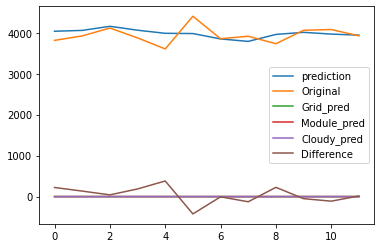

In [75]:
diff_power.plot()

In [76]:
mean_squared_error(power_16[:12],forecast_power)**(1/2)

206.20573895002883

In [77]:
mean_absolute_error(power_16[:12],forecast_power)

160.360828555204

In [78]:
r2_score(power_16[:12],forecast_power)

NameError: name 'r2_score' is not defined

## VARMAX